In [1]:
import shutil, os, re, pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [2]:
id = [re.findall('\d+',i) for i in os.listdir(path='/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped')]
# If we extract all directory name with findall we return it as list.
# then we convert it to a 1D array where we find the unique values of the list using set operation and appending to a dataframe.
flat_list = [j for i in id for j in i] 
aList = list(set(flat_list))
aList.sort()

In [3]:
# Create a new dataframe
df = pd.DataFrame(columns=['Subject_ID','Motion','Heart Rate','Steps','Sleep labels'])
df.head()

,Subject_ID,Motion,Heart Rate,Steps,Sleep labels


In [4]:
df['Subject_ID'] = aList

In [5]:
df.head()

,Subject_ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,NaN,NaN,NaN,NaN
1,1360686,NaN,NaN,NaN,NaN
2,1449548,NaN,NaN,NaN,NaN
3,1455390,NaN,NaN,NaN,NaN
4,1818471,NaN,NaN,NaN,NaN


In [6]:
def foo(path):
    f = open(path)
    lines = [[i.strip()] for i in f.readlines()]
    return lines
for i in range(len(df['Subject_ID'])):
    if df['Subject_ID'][i] == aList[i]:
        df['Motion'][i] = foo(os.path.join(first+second+aList[i]+'_cleaned_motion.out'))
        df['Heart Rate'][i] = foo(os.path.join(first+second+aList[i]+'_cleaned_hr.out'))
        df['Steps'][i] = foo(os.path.join(first+second+aList[i]+'_cleaned_counts.out'))
        df['Sleep labels'][i] = foo(os.path.join(first+second+aList[i]+'_cleaned_psg.out'))

In [7]:
df.head()

,Subject_ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,"[[0.015948 0.403931 0.449005 -0.796860], [0.03...","[[6.385610 52.000000], [9.385610 52.000000], [...","[[0.015948,0.000000], [15.031397,0.000000], [3...","[[0.000000 0.000000], [30.000000 0.000000], [6..."
1,1360686,"[[1255.053419 0.019989 -0.338638 -0.943909], [...","[[1.757280 77.000000], [4.757280 77.000000], [...","[[1255.053419,0.000000], [1270.064205,42.98000...","[[0.000000 -1.000000], [30.000000 -1.000000], ..."
2,1449548,"[[0.008770 0.960754 -0.128326 -0.385315], [0.0...","[[2.500480 77.000000], [12.500480 77.000000], ...","[[0.008770,248.670000], [15.024332,18.420000],...","[[0.000000 -1.000000], [30.000000 -1.000000], ..."
3,1455390,"[[0.000578 0.045166 0.446655 -0.885330], [0.02...","[[0.359270 87.000000], [5.359270 82.000000], [...","[[0.000578,27.630000], [15.008156,36.840000], ...","[[0.000000 -1.000000], [30.000000 -1.000000], ..."
4,1818471,"[[0.012105 -0.352020 0.013397 0.934128], [0.03...","[[7.315840 77.000000], [8.315840 77.000000], [...","[[0.012105,0.000000], [15.027303,0.000000], [3...","[[0.000000 -1.000000], [30.000000 -1.000000], ..."


In [33]:
# Create a new dataframe which consist of subject id and its' respected number of records present
df_new = pd.DataFrame(columns=['Subject ID','Motion','Heart Rate','Steps','Sleep labels']) # Creates an empty dataset
df_new.head()

,Subject ID,Motion,Heart Rate,Steps,Sleep labels


In [34]:
# Appending our subject id to our newly created dataset
df_new['Subject ID'] = aList
df_new.head() #df_new will be the dataframe with the lengths of the entries
# Since we appended subject ID so for the rest of the columns we get Not a Number aka NaN. This is because we didn't append the value there. 

,Subject ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,NaN,NaN,NaN,NaN
1,1360686,NaN,NaN,NaN,NaN
2,1449548,NaN,NaN,NaN,NaN
3,1455390,NaN,NaN,NaN,NaN
4,1818471,NaN,NaN,NaN,NaN


In [35]:
first = '/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/'
for i in range(len(df_new['Subject ID'])):
    if df_new['Subject ID'][i] == aList[i]:
        df_new['Motion'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_motion.out')))

        df_new['Heart Rate'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_hr.out')))

        df_new['Steps'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_counts.out')))

        df_new['Sleep labels'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_psg.out')))

In [126]:
df_new.head()

,Subject ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,1187903,4964,1892,951
1,1360686,1383532,5574,1850,967
2,1449548,1620804,5549,1927,964
3,1455390,1483701,5717,1978,989
4,1818471,1481035,5701,1973,987


In [140]:
len(df_new['Sleep labels'])

31

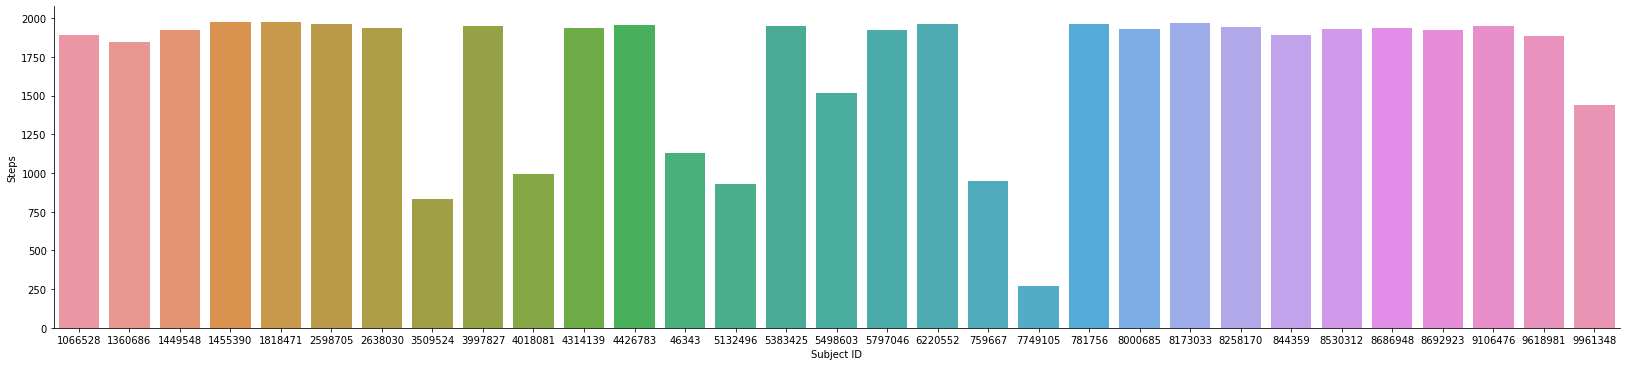

In [127]:
# Plot for steps
sns.catplot(x='Subject ID', y='Steps', kind='bar', data=df_new,aspect=45/10)

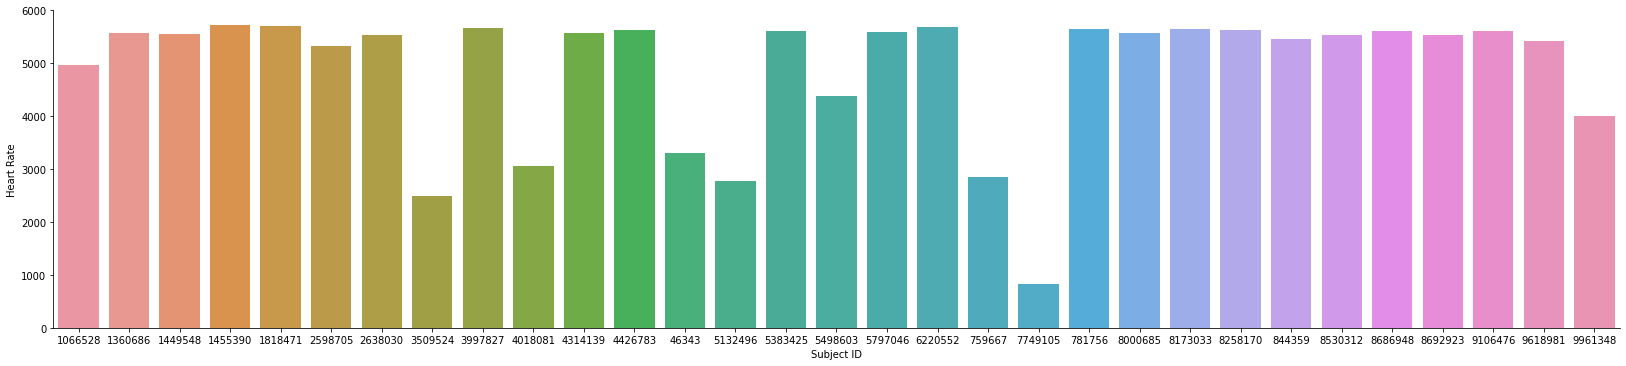

In [83]:
# Plot for Heart Rate
sns.catplot(x='Subject ID', y='Heart Rate', kind='bar', data=df_new,aspect=45/10)

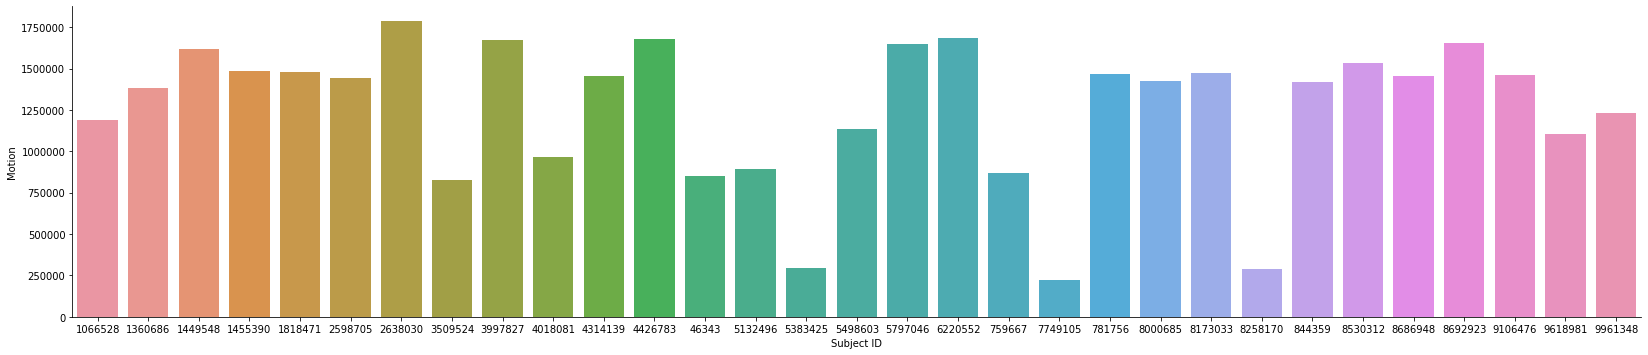

In [86]:
# Plot for Motion
sns.catplot(x='Subject ID', y='Motion', kind='bar', data=df_new,aspect=45/10)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

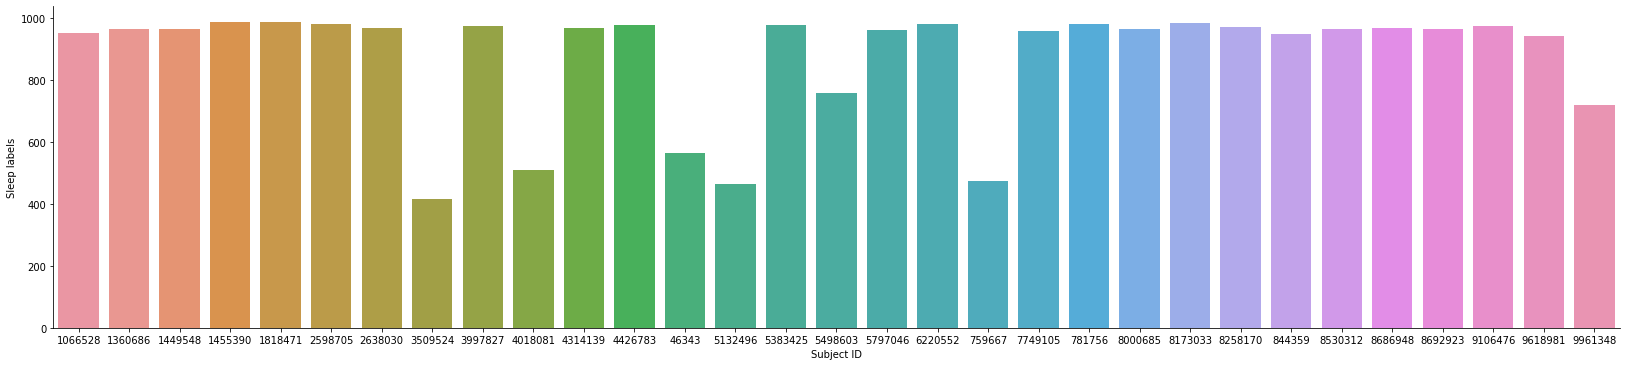

In [85]:
# Plot for Sleep Labels
sns.catplot(x='Subject ID', y='Sleep labels', kind='bar', data=df_new,aspect=45/10)

In [147]:
## -- PART II -- ##
#show/plot the total amount of records per sleep stage (for  all subjects together)
z = []
first = '/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/'
for i in range(len(df['Subject_ID'])):
    if df['Subject_ID'][i] == aList[i]:
        z.append( os.path.join(first+aList[i]+'_cleaned_psg.out')  )

wq,qw = [],[]
for i in z:
    for k,j in fileRead(i):
        wq.append(k)
        qw.append(j)
qw.sort()
amna = pd.DataFrame(columns=['t','x'])
amna['t'] = wq
amna['x'] = qw

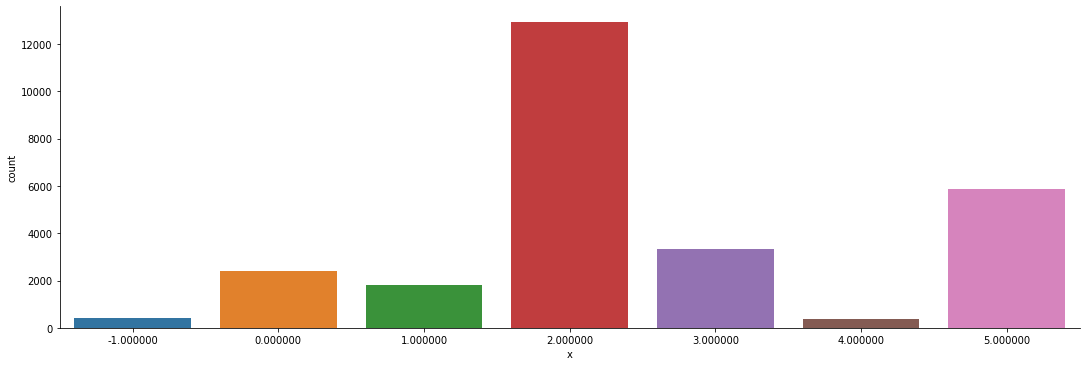

In [148]:
sns.catplot(x='x', kind='count', data=amna, height=5, aspect=15/5)

In [ ]:
## -- PART III -- ##
#using  the data collected from a  randomly chosen subject id plot:
# subject ID = 9961348

In [89]:
######   all three acceleration axes per timestamp (in one graph) ######
accel_list = df.loc[30,'Motion']
for i in range(len(accel_list)):
  accel_list[i] = accel_list[i][0].split(" ")
  [float(x) for x in accel_list[i]] 

In [90]:
time_stamps_accel,x_axis,y_axis, z_axis = map(list, zip(*accel_list))

In [91]:
# Create a new data frame so that u can plot it easily
ane = pd.DataFrame(columns=['Time Stamp','X','Y','Z'])
ane['Time Stamp'] = time_stamps_accel
ane['X'] = x_axis
ane['Y'] = y_axis
ane['Z'] = z_axis
ane.head()

,Time Stamp,X,Y,Z
0,0.018318,-0.283127,0.250244,-0.919311
1,0.029009,-0.282196,0.253677,-0.915863
2,0.049053,-0.283173,0.256134,-0.917374
3,0.068820,-0.283142,0.253189,-0.919311
4,0.088152,-0.281631,0.252197,-0.922714


In [95]:
xy = ane.head(40) # To plot this to remove RAM memory allocation 
import warnings
warnings.filterwarnings('ignore')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

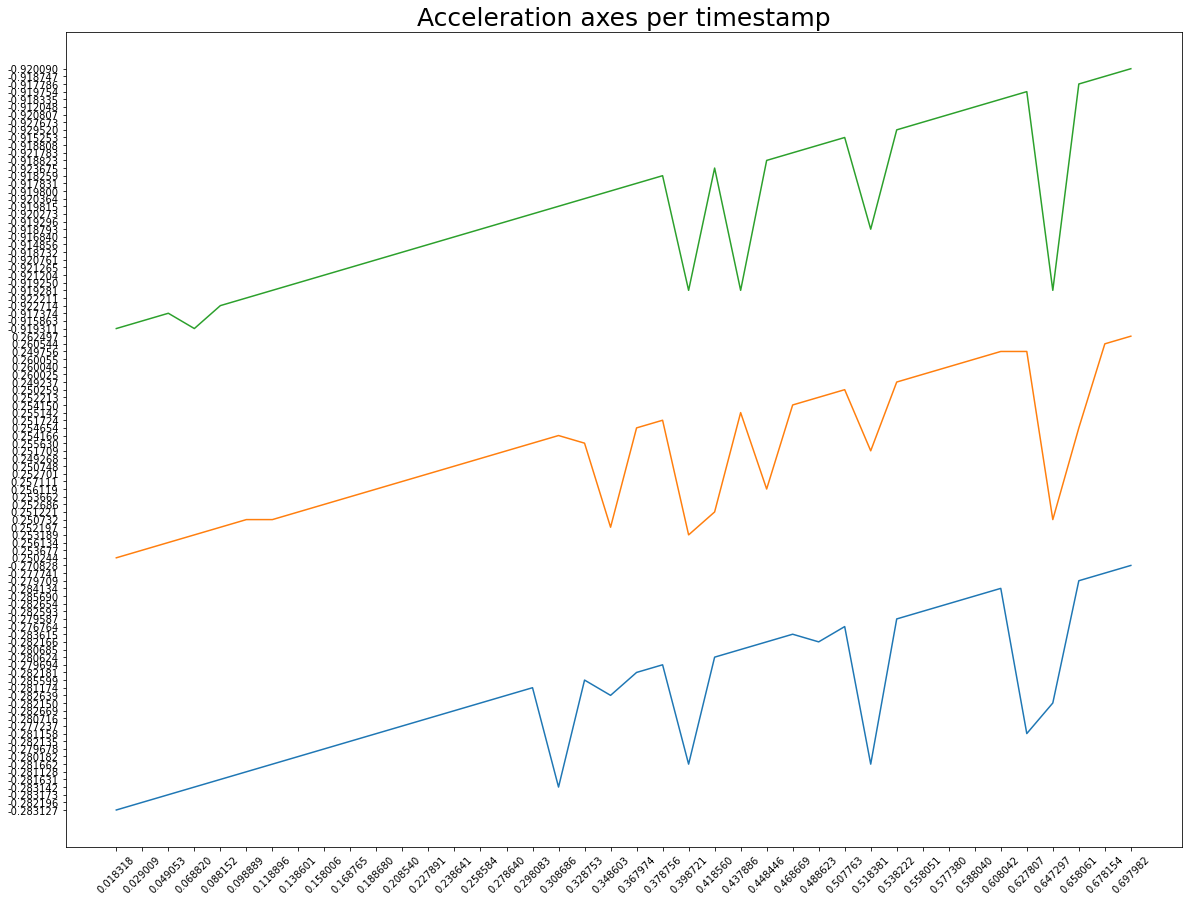

In [103]:
plt.figure(figsize=(20,15))
plt.plot('Time Stamp','X',data=xy)
plt.plot('Time Stamp','Y',data=xy)
plt.plot('Time Stamp','Z',data=xy)
plt.title('Acceleration axes per timestamp',fontsize=25)
plt.xticks(rotation = 45)

In [104]:
######   heart rate values per timestamp ######
hr_list = df.loc[30,'Heart Rate']
for i in range(len(hr_list)):
  hr_list[i] = hr_list[i][0].split(" ")
  [float(x) for x in hr_list[i]] 

In [105]:
time_stamps_hr,hr = map(list, zip(*hr_list))

In [106]:
heart_rate = pd.DataFrame(columns=['Time Stamp'])
heart_rate['Time Stamp'] = time_stamps_hr
heart_rate['heart Rate'] = hr
heart_rate.head()

,Time Stamp,heart Rate
0,0.822260,52.000000
1,7.822290,53.000000
2,11.822290,54.000000
3,16.822260,55.000000
4,21.822260,55.000000


In [107]:
yx = heart_rate.head(40) # To plot this to remove RAM memory allocation 

Text(0.5, 1.0, 'heart rate values per timestamp')

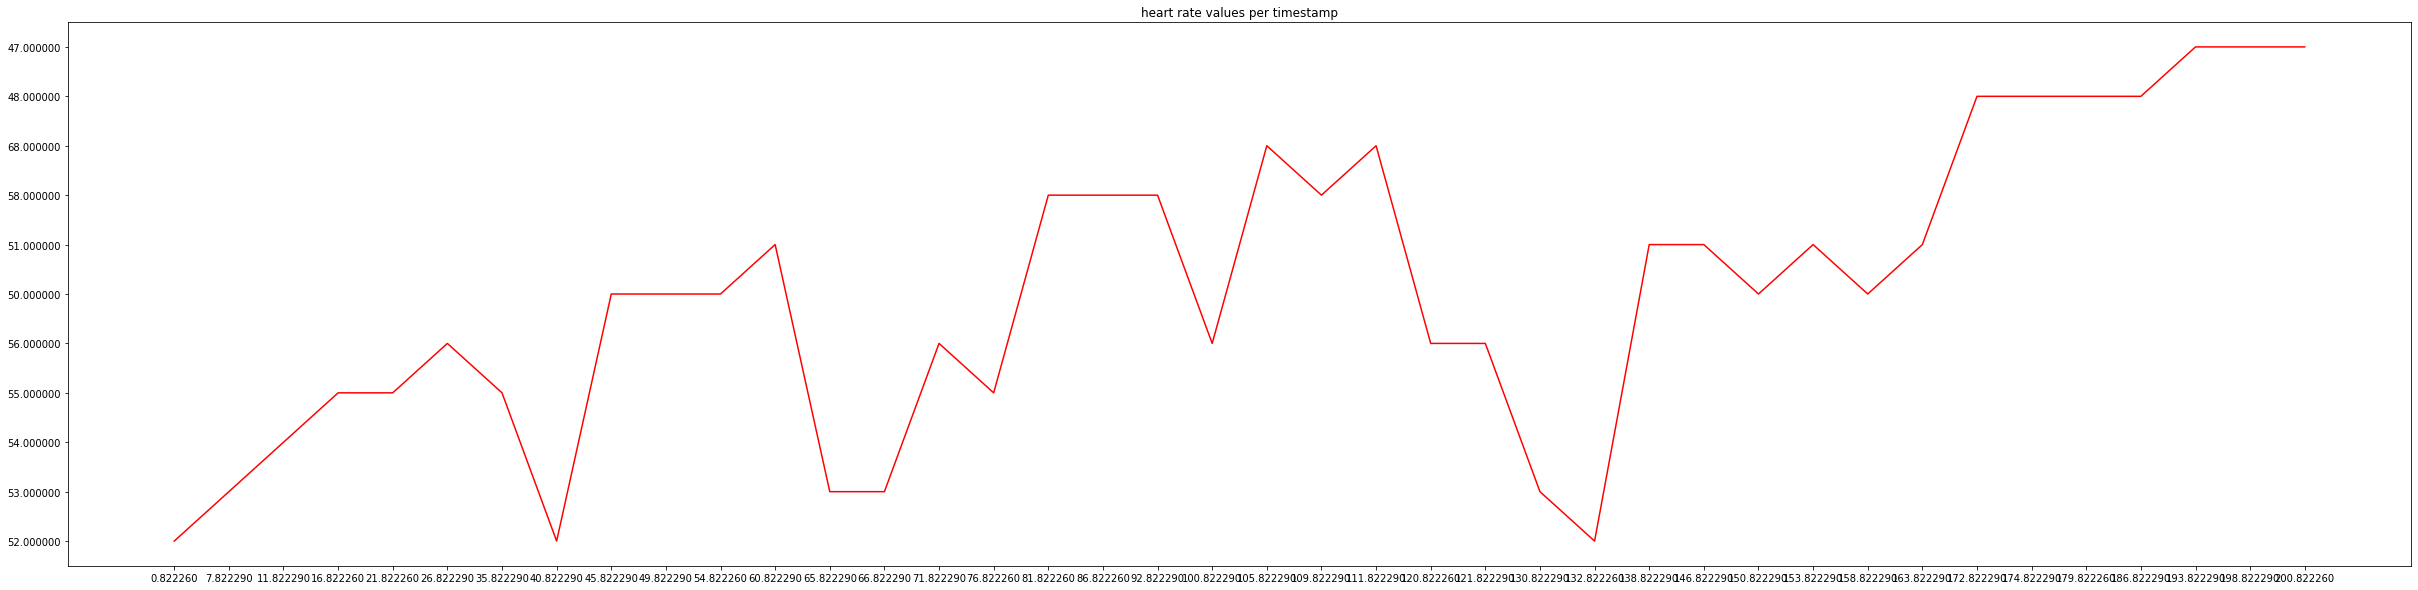

In [114]:
plt.figure(figsize=(42,10))
plt.plot('Time Stamp', 'heart Rate', data=yx, color='red')
plt.title('heart rate values per timestamp')

In [115]:
#####    sleep stages per timestamp ######
sleep_list = df.loc[30,'Sleep labels']

#Making a list out of every entry
for i in range(len(sleep_list)):
  sleep_list[i] = sleep_list[i][0].split(" ")
  [float(x) for x in sleep_list[i]] 
  
#splits nested list into seperate columns
time_stamps_sleep,sleep_lab = map(list, zip(*sleep_list))

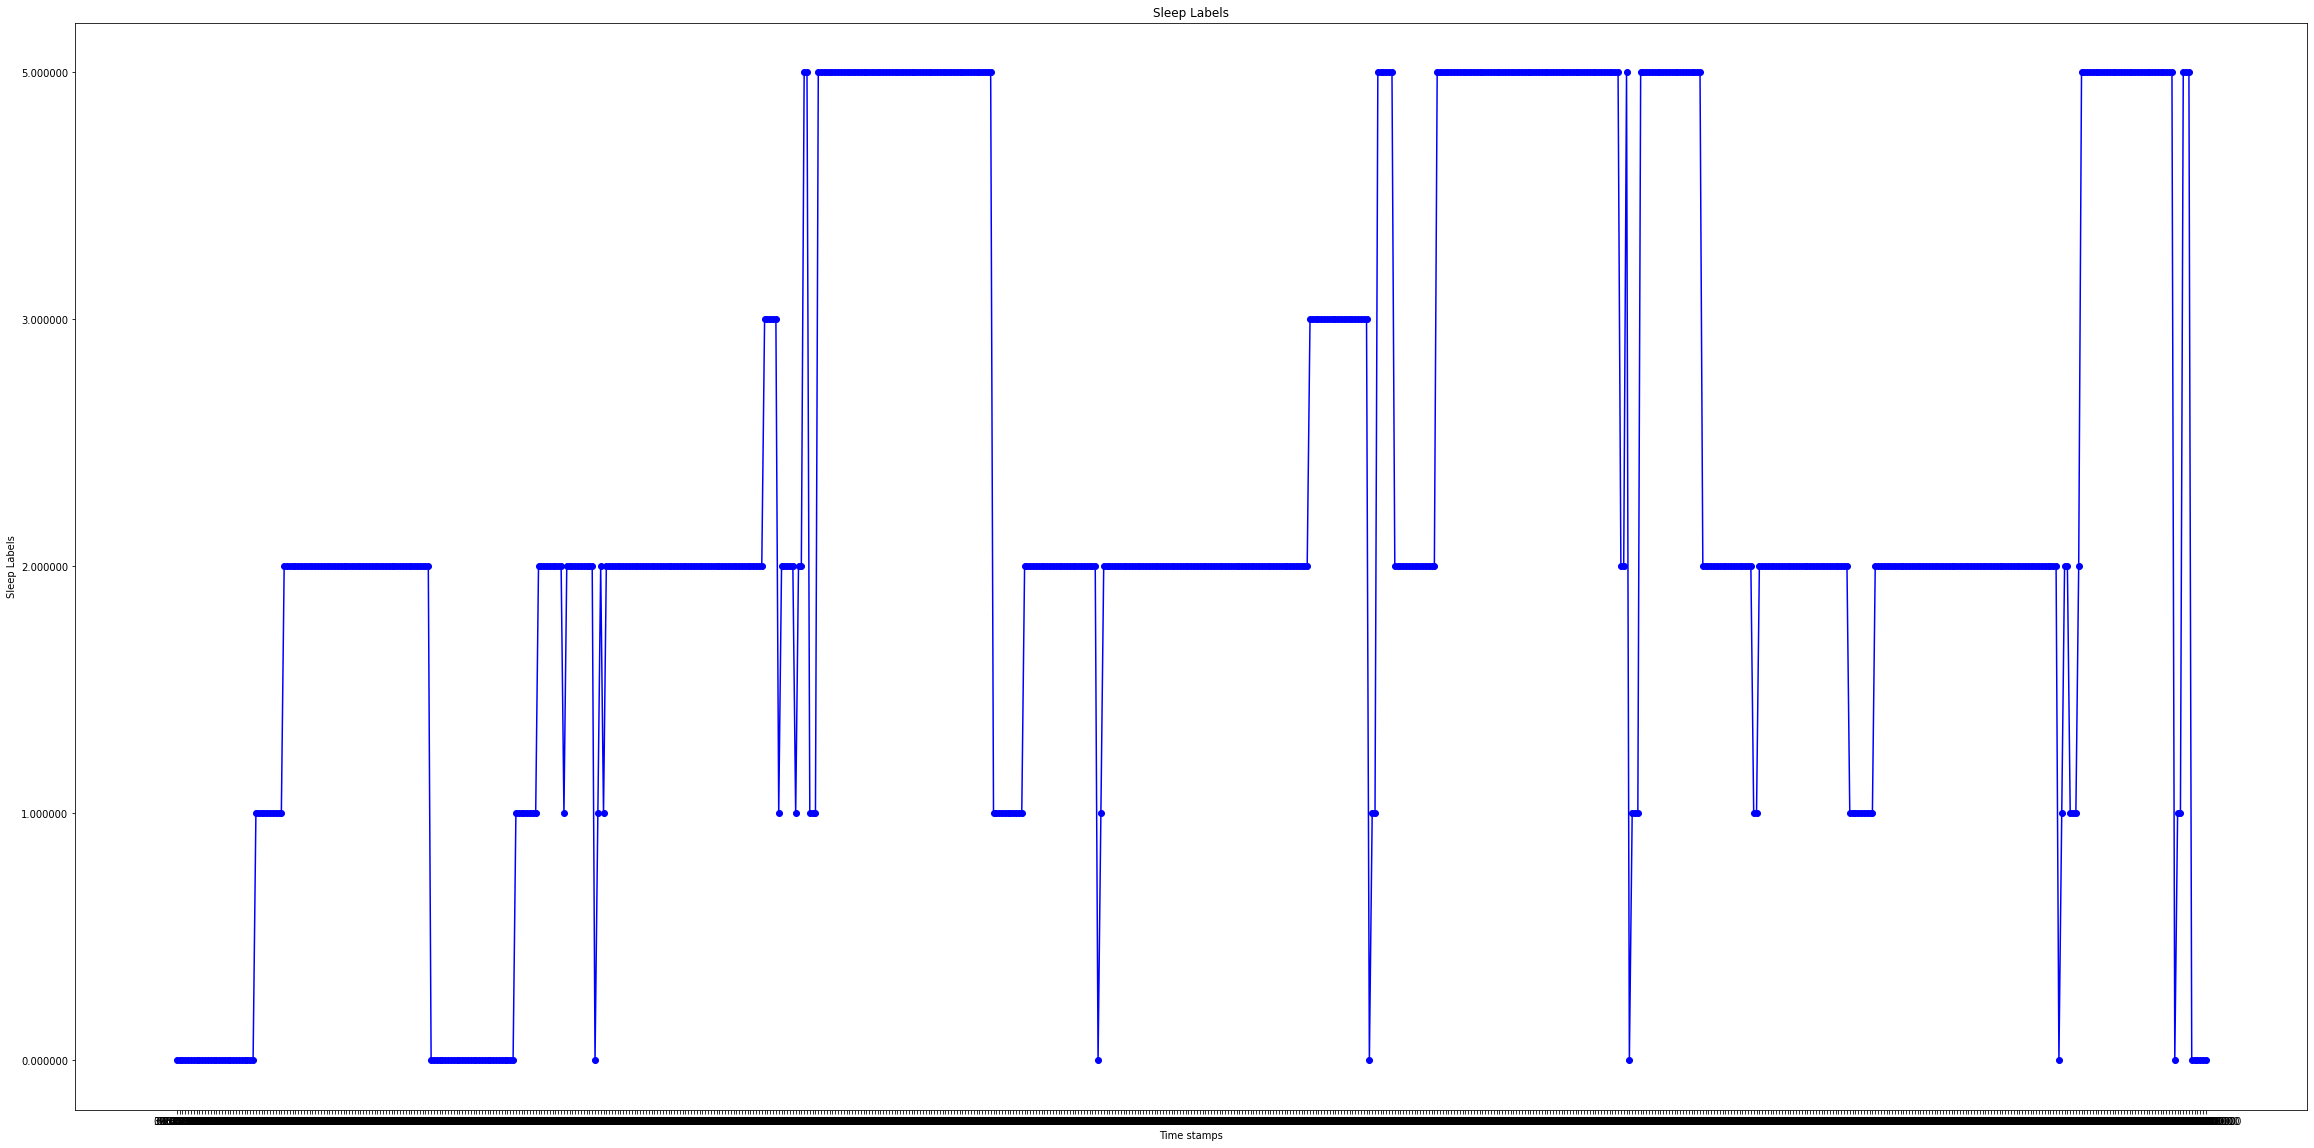

In [122]:
plt.figure(figsize=(40,20))
plt.plot(time_stamps_sleep,sleep_lab, 'bo',linestyle = 'solid')
plt.xlabel('Time stamps')
plt.ylabel('Sleep Labels')
plt.title('Sleep Labels')
plt.show()

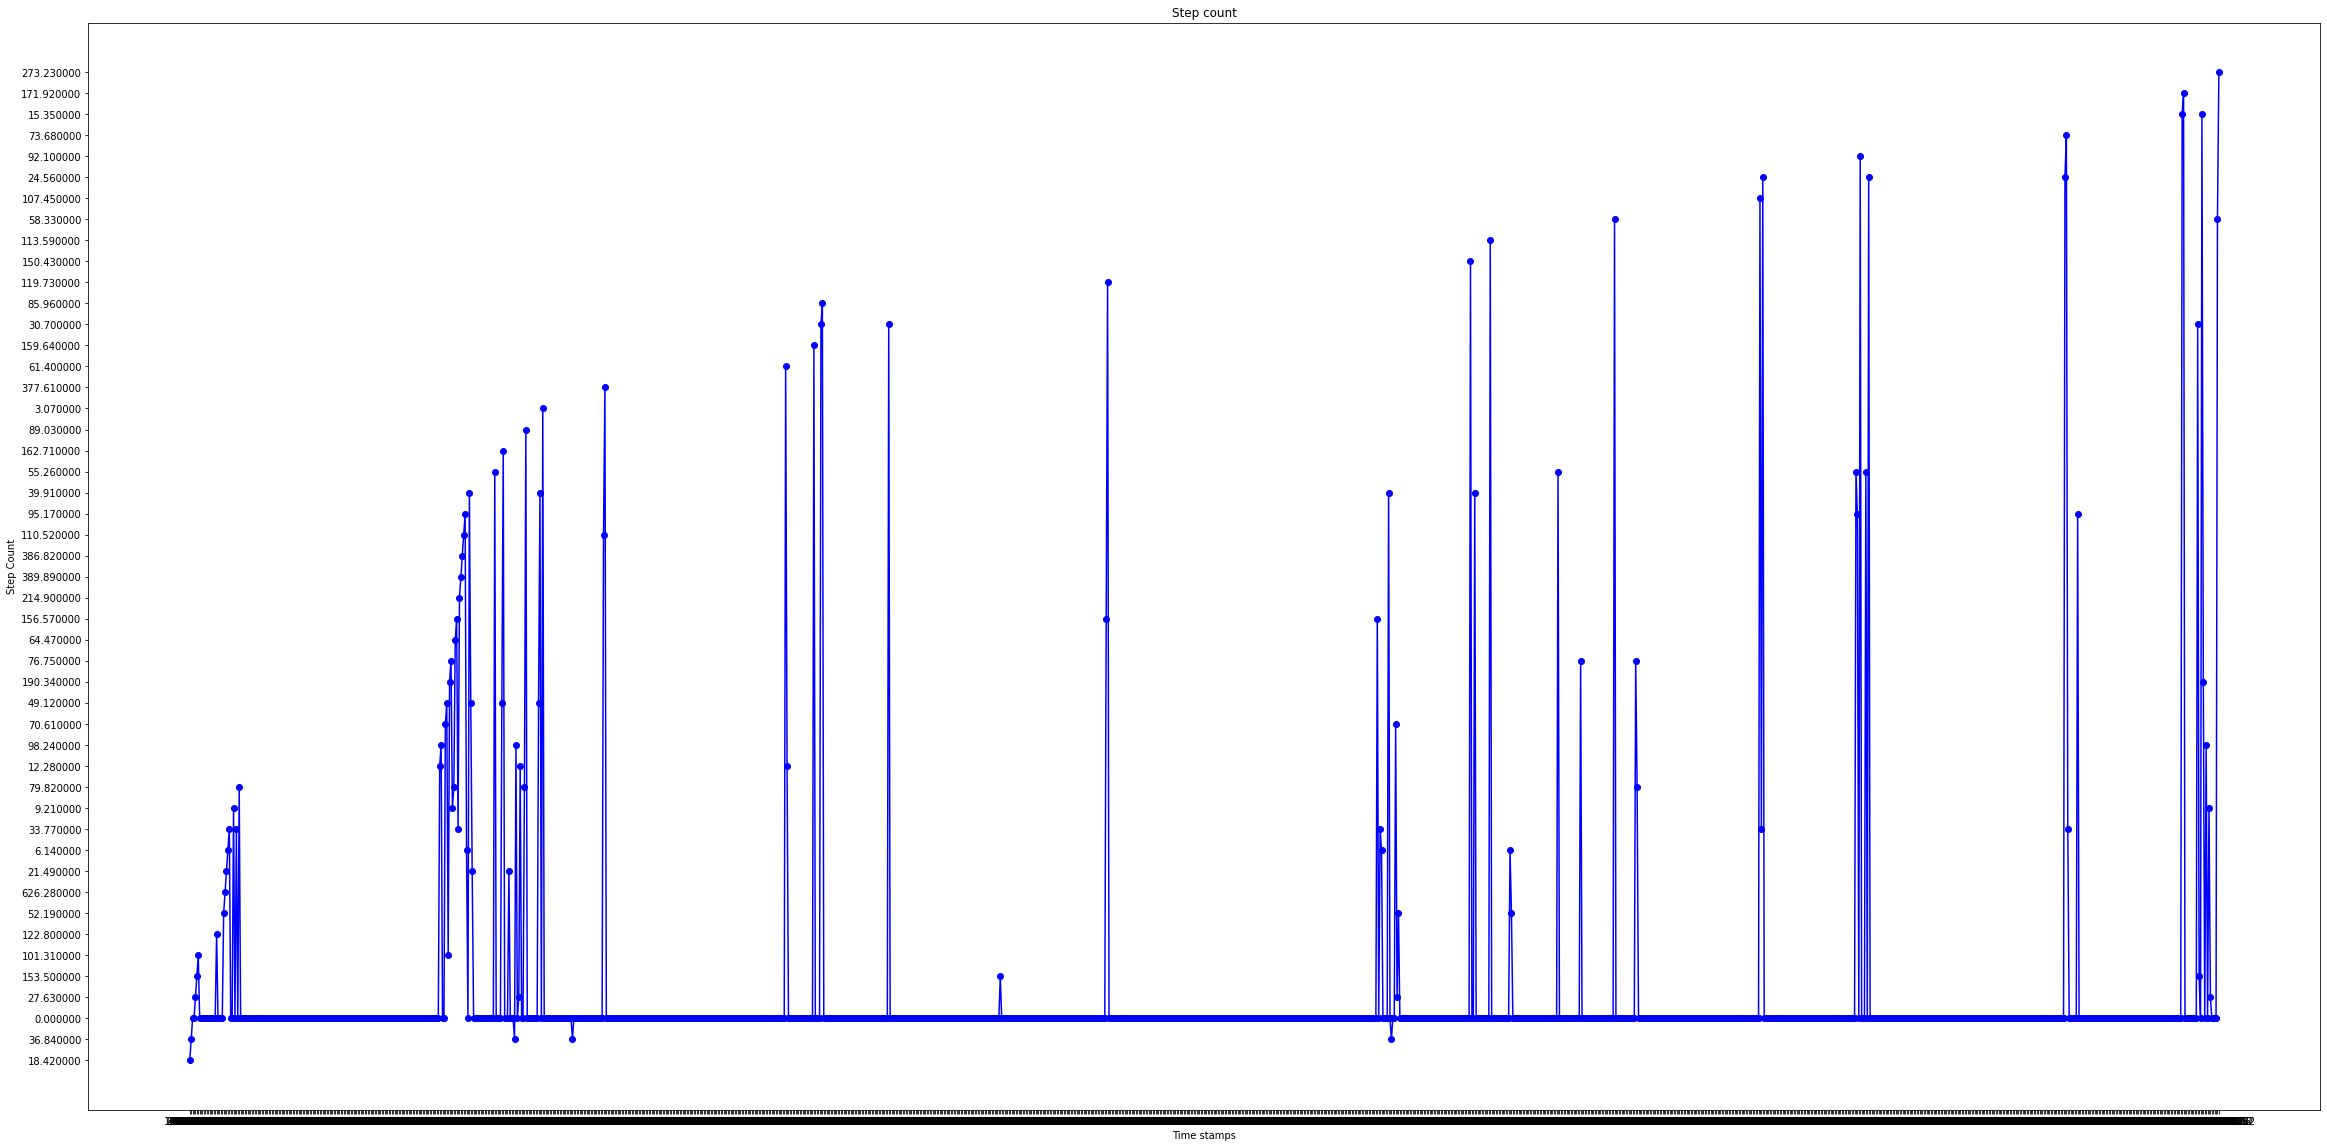

In [149]:
######   nr of steps per timestamp ######
step_list = df.loc[30,'Steps']
step_list
#Making a list out of every entry
for i in range(len(step_list)):
  step_list[i] = step_list[i][0].split(",")
  [float(x) for x in step_list[i]] 

#splits nested list into seperate columns
time_stamps_step,step = map(list, zip(*step_list))

plt.figure(figsize=(40,20))
plt.plot(time_stamps_step,step, 'bo',linestyle='solid')
plt.xlabel('Time stamps')
plt.ylabel('Step Count')
plt.title('Step count')
plt.show()